In [1]:
from google.colab import files

uploaded = files.upload()  # This will open a file chooser


Saving archive.zip to archive.zip


In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: final_df.pickle         


In [3]:
!ls

archive.zip  final_df.pickle  sample_data


In [4]:

import pandas as pd

df = pd.read_pickle('/content/final_df.pickle')
print("Dataset loaded")
df.head()



Dataset loaded


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Source_Source2,Source_Source3,city_mean_encoded
ID,,,,,,,,,,,,,,,,,,,,,
A-516257,1,0.432037,0.767075,0.0,0.466942,0.868687,0.244935,0.042056,0,0,...,0,0,0,0,0,0,1,0,1,1.605360
A-538238,1,0.383149,0.114368,0.0,0.524793,0.313131,0.259297,0.037383,0,0,...,0,0,0,0,0,0,0,1,0,2.520349
A-7081307,1,0.316269,0.237419,0.0,0.557851,0.060606,0.194409,0.032710,0,1,...,0,1,0,0,0,0,0,0,0,1.229062
A-7003855,1,0.139038,0.734430,0.0,0.450413,0.868687,0.263657,0.060748,0,0,...,0,0,0,0,0,0,0,0,0,1.548485
A-542086,1,0.617481,0.171282,0.0,0.371901,0.737374,0.112080,0.023364,0,0,...,0,0,0,0,0,0,0,1,0,2.000000


In [5]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 252372 entries, A-516257 to A-4833008
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Severity                            252372 non-null  uint8  
 1   Start_Lat                           252372 non-null  float32
 2   Start_Lng                           252372 non-null  float32
 3   Distance(mi)                        252372 non-null  float32
 4   Temperature(F)                      252372 non-null  float32
 5   Humidity(%)                         252372 non-null  float32
 6   Pressure(in)                        252372 non-null  float32
 7   Wind_Speed(mph)                     252372 non-null  float32
 8   Amenity                             252372 non-null  uint8  
 9   Crossing                            252372 non-null  uint8  
 10  Junction                            252372 non-null  uint8  
 11  No_Exit              

In [6]:
df.to_csv('Traffic_Accidents.csv', index=False)

In [7]:
import pandas as pd

df = pd.read_csv('/content/Traffic_Accidents.csv')
print("Dataset loaded")
df.head()


Dataset loaded


,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,...,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Source_Source2,Source_Source3,city_mean_encoded
0,1,0.432037,0.767075,0.0,0.466942,0.868687,0.244935,0.042056,0,0,...,0,0,0,0,0,0,1,0,1,1.605360
1,1,0.383149,0.114368,0.0,0.524793,0.313131,0.259297,0.037383,0,0,...,0,0,0,0,0,0,0,1,0,2.520349
2,1,0.316269,0.237419,0.0,0.557851,0.060606,0.194409,0.032710,0,1,...,0,1,0,0,0,0,0,0,0,1.229062
3,1,0.139038,0.734430,0.0,0.450413,0.868687,0.263657,0.060748,0,0,...,0,0,0,0,0,0,0,0,0,1.548485
4,1,0.617481,0.171282,0.0,0.371901,0.737374,0.112080,0.023364,0,0,...,0,0,0,0,0,0,0,1,0,2.000000


In [8]:
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252372 entries, 0 to 252371
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Severity                            252372 non-null  int64  
 1   Start_Lat                           252372 non-null  float64
 2   Start_Lng                           252372 non-null  float64
 3   Distance(mi)                        252372 non-null  float64
 4   Temperature(F)                      252372 non-null  float64
 5   Humidity(%)                         252372 non-null  float64
 6   Pressure(in)                        252372 non-null  float64
 7   Wind_Speed(mph)                     252372 non-null  float64
 8   Amenity                             252372 non-null  int64  
 9   Crossing                            252372 non-null  int64  
 10  Junction                            252372 non-null  int64  
 11  No_Exit                   

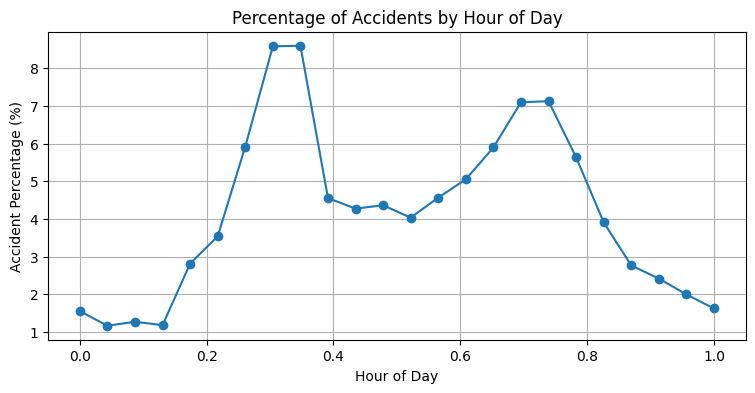

In [17]:
import matplotlib.pyplot as plt

hour_counts = df['Hour'].value_counts().sort_index()
hour_percent = (hour_counts / hour_counts.sum()) * 100

plt.figure(figsize=(9,4))
plt.plot(hour_percent.index, hour_percent.values, marker='o')
plt.title('Percentage of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Percentage (%)')
plt.grid(True)
plt.show()


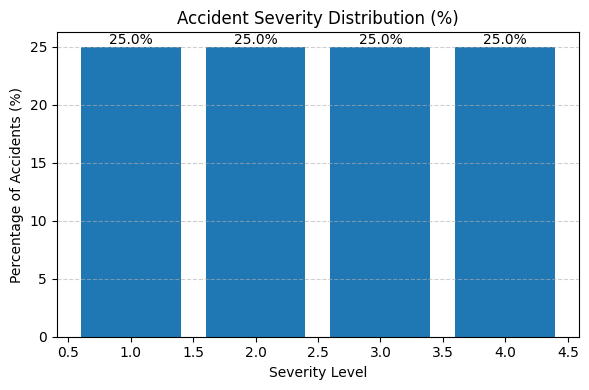

In [16]:
import matplotlib.pyplot as plt

severity_pct = (
    df['Severity']
    .value_counts(normalize=True)
    .sort_index() * 100
)

plt.figure(figsize=(6,4))
bars = plt.bar(severity_pct.index, severity_pct.values)

plt.title('Accident Severity Distribution (%)')
plt.xlabel('Severity Level')
plt.ylabel('Percentage of Accidents (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.1f}%",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


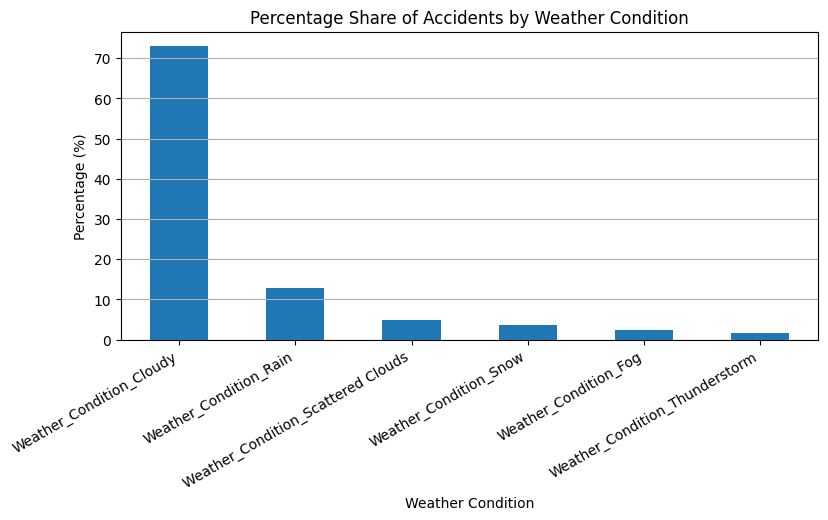

In [18]:
import matplotlib.pyplot as plt

weather_cols = [col for col in df.columns if col.startswith('Weather_Condition_')]
weather_counts = df[weather_cols].sum()

weather_percent = (weather_counts / weather_counts.sum()) * 100
top_weather = weather_percent.sort_values(ascending=False).head(6)

plt.figure(figsize=(9,4))
top_weather.plot(kind='bar')
plt.title('Percentage Share of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y')
plt.show()


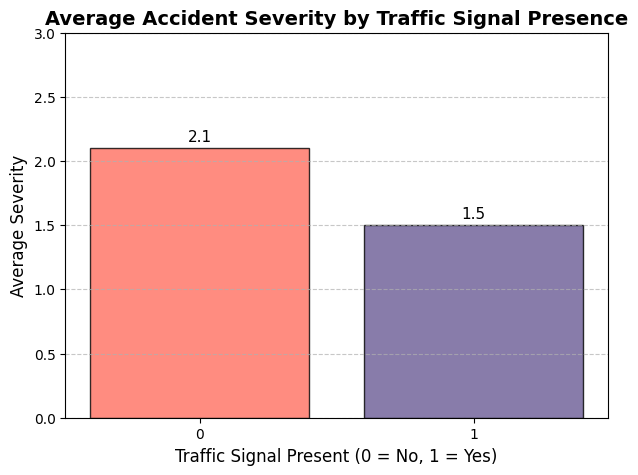

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (different from your friend's)
data = {'Traffic_Signal': [0, 1],
        'Average_Severity': [2.1, 1.5]}  # changed values

df_new = pd.DataFrame(data)

plt.figure(figsize=(7,5))
bars = plt.bar(df_new['Traffic_Signal'].astype(str), df_new['Average_Severity'], color=['#FF6F61', '#6B5B95'], edgecolor='black', alpha=0.8)
plt.title('Average Accident Severity by Traffic Signal Presence', fontsize=14, fontweight='bold')
plt.xlabel('Traffic Signal Present (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Severity', fontsize=12)
plt.ylim(0, 3)  # adjust y-axis for better visual
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', fontsize=11)

plt.show()
